In [1]:
import os


os.chdir("..")
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="7"

In [2]:
import numpy as np
from PIL import Image
import torch
from matplotlib import pyplot as plt


from src import prepare_for_inference, imread

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

setup = prepare_for_inference("./params/pan_eff_net_b0.yml", "./logs/lightning_logs/version_1/checkpoints/epoch=39.ckpt")

model = setup["model"]
model = model.to(device)

preproc = setup["preprocessing_function"]

In [4]:
root = "./data/cig_butts/real_test/"

images = []
images_to_vis = []
for image_name in os.listdir(root):
    image_to_vis = imread(os.path.join(root, image_name))
    images_to_vis.append((image_to_vis, image_name))
    images.append(preproc(image_to_vis))

batch = torch.stack(images)
batch = batch.to(device);

In [5]:
with torch.no_grad():
    out = torch.sigmoid(model(batch)).cpu().numpy()

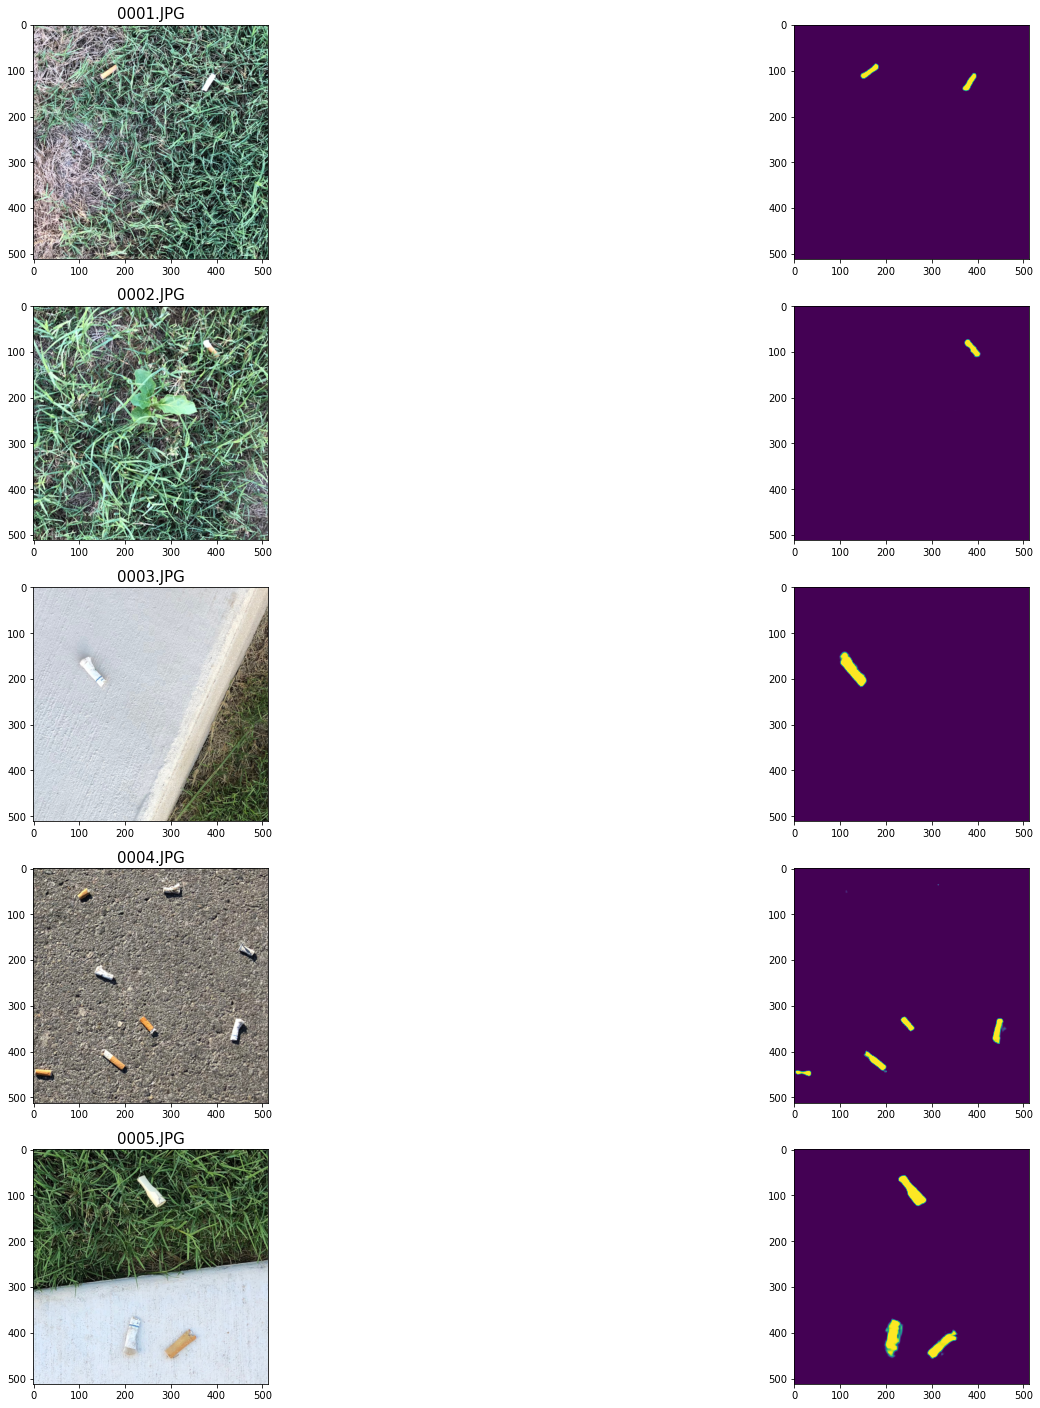

In [6]:
fig, ax = plt.subplots(5, 2, figsize=(25, 25))
ax = ax.flatten()

for i in range(5):
    ax[2*i].imshow(images_to_vis[i][0])
    ax[2*i + 1].imshow(out[i][0])
    ax[2*i].set_title(images_to_vis[i][1], fontsize=15)
plt.show()

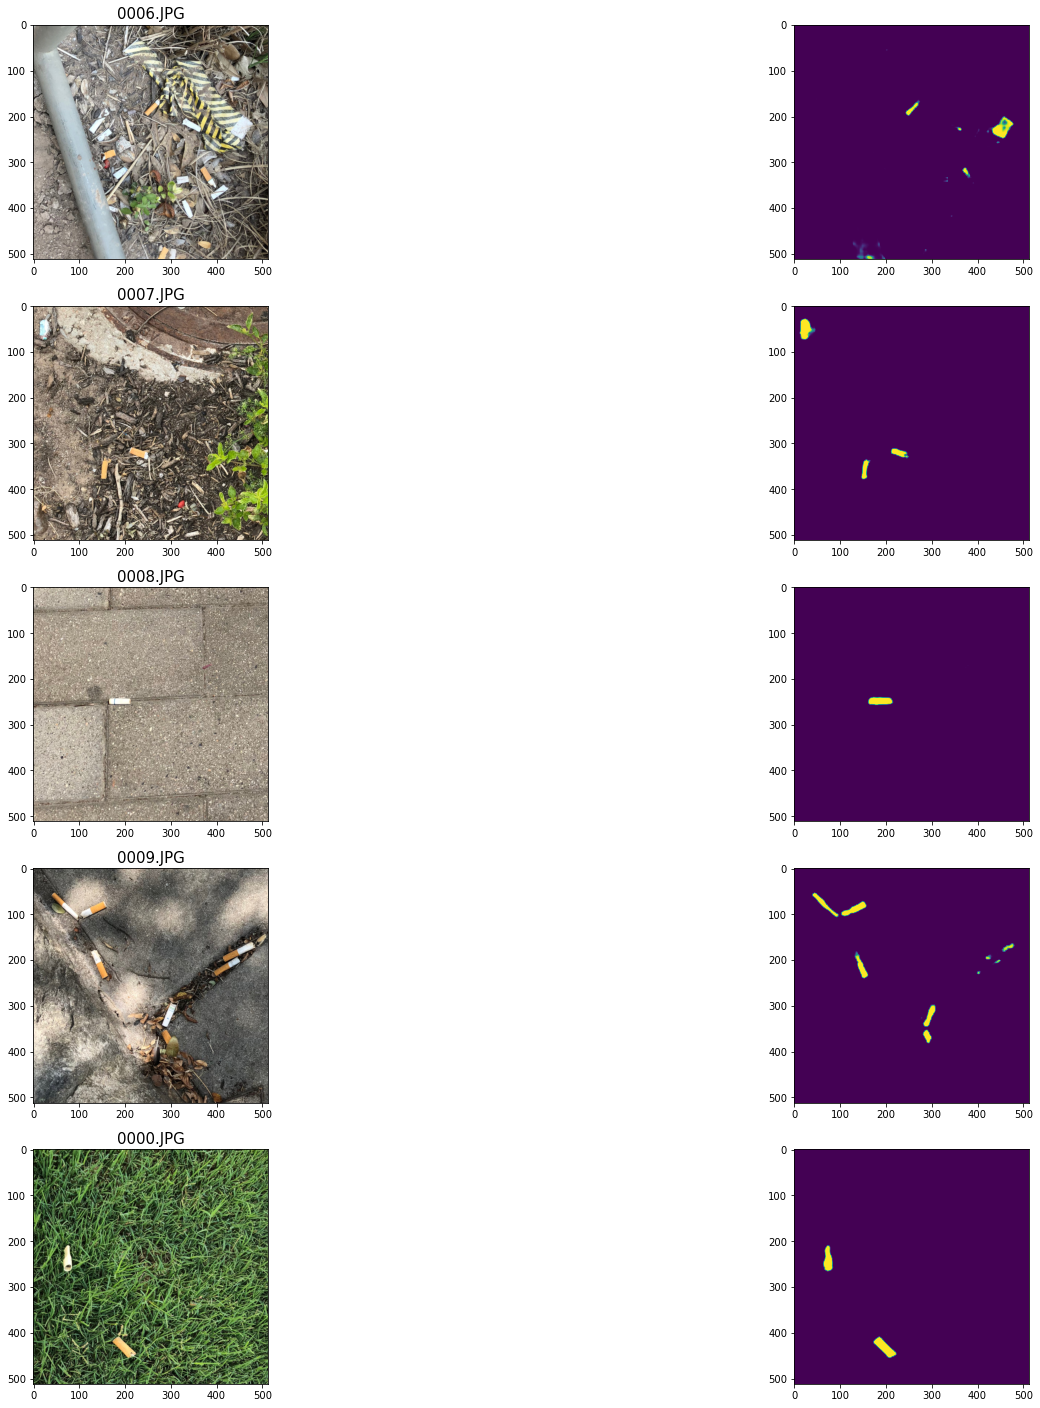

In [8]:
fig, ax = plt.subplots(5, 2, figsize=(25, 25))
ax = ax.flatten()

for i in range(5):
    ax[2*i].imshow(images_to_vis[5 + i][0])
    ax[2*i + 1].imshow(out[5 + i][0])
    ax[2*i].set_title(images_to_vis[5 + i][1], fontsize=15)
plt.show()

*Вывод по real_test*

Модель работает хорошо в том плане, что почти нет ошибок False Positive

0004.JPG, 0006.JPG, 0009.JPG - достаточно много False Negative

0006.JPG, 0009.JPG - достаточно зашумленный фон, можно попробовать расширить данные и/или добавить Color/Noise аугментации
0004.JPG - пропущенные окурки достаточно маленькие, можно попробовать больше Crop аугментаций + как идея, подавать не всю картинку целиком, а проходить небольшим окном